## Resampling Datetime Data Core

**Student:** Matthew Malueg

## Imports, loading, preparation

**Load data and imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

In [2]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


## Answers

### Part 1

**1. Convert date column to datetime type**

In [3]:
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')

**2. Set datetime as new index and inspect**

In [4]:
df = df.set_index(['datetime'])
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


**3. Filter down to the requested data**
- Only data after the year 2000
- preceipitation
- mean_temp
- min_temp
- max_temp
- snow_depth

In [5]:
df = df.drop(columns=['date', 'cloud_cover', 'sunshine', 'global_radiation', 'pressure'])
df = df.loc['2000':]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


**4. Impute missing values**

In [6]:
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['mean_temp'] = df['mean_temp'].interpolate()

In [7]:
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

### Part 2

#### Q1: What month had the most precipitation between 2000 through 2010?

In [8]:
# Make a temporary dataframe of selected data
df_precip = df.loc['2000':'2010']
# Get relevant column of data for plotting
max_precip = df_precip['precipitation']

In [9]:
# Resample data to monthly frequency with .sum() method
max_p_res = max_precip.resample("MS").sum()
max_p_res.name = "Resampled"
max_p_res.head()

datetime
2000-01-01    14.3
2000-02-01    62.2
2000-03-01    13.4
2000-04-01    71.8
2000-05-01    68.4
Freq: MS, Name: Resampled, dtype: float64

In [10]:
# Determine day with max precipitation
max_p_date = max_p_res.idxmax()
max_p_date

Timestamp('2009-11-01 00:00:00', freq='MS')

In [11]:
# Display max precipitation
max_p_res.loc[max_p_date]

138.4

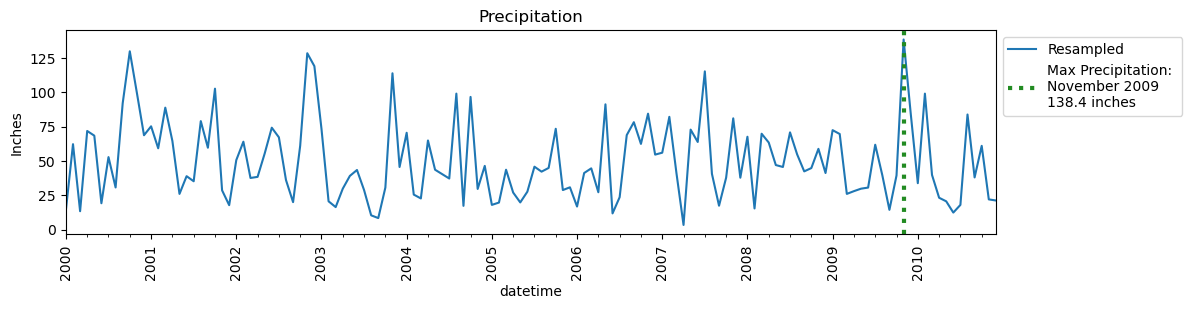

In [12]:
# Set figure parameters
fig, ax = plt.subplots(figsize=(12,3))
ax.set(title='Precipitation', ylabel='Inches')

# Plot individual lines
max_p_res.plot(ax=ax, style='-')

## Apply tick formatters
loc_year = mdates.YearLocator()

# Add vertical line at day with max precipitation
ax.axvline(max_p_date, color='forestgreen',lw=3, ls=':',label=f"Max Precipitation: \n{max_p_date.strftime('%B %Y')} \n{max_p_res.loc[max_p_date]} inches")

# Finish figure
fig.autofmt_xdate(which='major', rotation=90, ha='center')
ax.legend(bbox_to_anchor=[1,1]);

- The most precipitation occured in November of 2009, with a total of 138.4 inches.

#### Q2: Which year between 2000 and 2020 had the coolest average temperature?

In [13]:
# Get temporary dataframe for relevant years
df_temps = df.loc['2000':'2020']
# Get columns of relevant data for plotting
mean_temps = df_temps['mean_temp']

In [14]:
# Resample data to yearly frequency with .mean() method
mean_temps_res = mean_temps.resample("AS").mean()
mean_temps_res.name = "Resampled"
mean_temps_res.head()

datetime
2000-01-01    11.575683
2001-01-01    11.331507
2002-01-01    12.084247
2003-01-01    12.114521
2004-01-01    11.900683
Freq: AS-JAN, Name: Resampled, dtype: float64

In [15]:
# Determine day with max precipitation
min_temp = mean_temps_res.idxmin()
min_temp

Timestamp('2010-01-01 00:00:00', freq='AS-JAN')

In [16]:
# Display min temperature
min_temp_round = round(mean_temps_res.loc[min_temp], 2)
min_temp_round

10.66

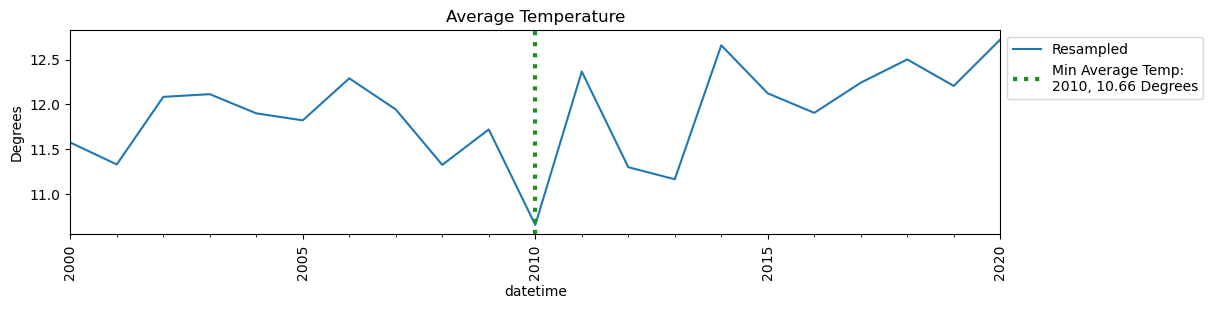

In [17]:
# Set figure parameters
fig, ax = plt.subplots(figsize=(12,3))
ax.set(title='Average Temperature', ylabel='Degrees')

# Plot individual lines
mean_temps_res.plot(ax=ax, style='-')

## Apply tick formatters
loc_year = mdates.YearLocator()

# Add vertical line at day with max precipitation
ax.axvline(min_temp, color='forestgreen',lw=3, ls=':', label=f"Min Average Temp: \n{min_temp.strftime('%Y')}, {min_temp_round} Degrees")

# Finish figure
fig.autofmt_xdate(which='major', rotation=90, ha='center')
ax.legend(bbox_to_anchor=[1,1]);

- The lowest average temperatures occured in 2010, with an average of 10.66 degrees.